In [142]:
import pandas as pd

traveler_data=pd.read_csv('tn_traveller_master_여행객 Master.csv')
post_data=pd.read_csv('tn_adv_consume_his_사전소비내역.csv')
lod_data=pd.read_csv('tn_lodge_consume_his_숙박소비내역.csv')
traf_data=pd.read_csv('tn_mvmn_consume_his_이동수단소비내역.csv')
acti_data=pd.read_csv('tn_activity_consume_his_활동소비내역.csv')
companicon_data=pd.read_csv('tn_companion_info_동반자정보.csv')

In [143]:
traveler_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14400 entries, 0 to 14399
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TRAVELER_ID                14400 non-null  object 
 1   RESIDENCE_SGG_CD           14400 non-null  int64  
 2   GENDER                     14400 non-null  object 
 3   AGE_GRP                    14400 non-null  int64  
 4   EDU_NM                     14400 non-null  int64  
 5   EDU_FNSH_SE                14399 non-null  float64
 6   MARR_STTS                  14398 non-null  float64
 7   FAMILY_MEMB                14400 non-null  int64  
 8   JOB_NM                     13753 non-null  float64
 9   JOB_ETC                    647 non-null    float64
 10  INCOME                     14400 non-null  int64  
 11  HOUSE_INCOME               10716 non-null  float64
 12  TRAVEL_TERM                14400 non-null  int64  
 13  TRAVEL_NUM                 14400 non-null  int

In [144]:
traveler_data['TRAVEL_ID'] = traveler_data['TRAVELER_ID'].apply(lambda x: x[0] + '_' + x)

In [145]:
import datetime
traveler_data['start_day'] = traveler_data.TRAVEL_STATUS_YMD.str.split('~').str[0]
traveler_data['end_day'] = traveler_data.TRAVEL_STATUS_YMD.str.split('~').str[1]
traveler_data['start_day'] = pd.to_datetime(traveler_data['start_day'])
traveler_data['end_day'] = pd.to_datetime(traveler_data['end_day'])
trip_day_raw=traveler_data['end_day']-traveler_data['start_day']

traveler_data['trip_day']=trip_day_raw.dt.days + 1

In [146]:
traveler_data['trip_day'].value_counts()

1     5834
2     4722
3     2518
4      873
5      287
6       73
7       44
8       22
9        7
10       6
11       3
16       3
15       2
12       1
14       1
17       1
27       1
33       1
23       1
Name: trip_day, dtype: int64

In [147]:
traveler_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14400 entries, 0 to 14399
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   TRAVELER_ID                14400 non-null  object        
 1   RESIDENCE_SGG_CD           14400 non-null  int64         
 2   GENDER                     14400 non-null  object        
 3   AGE_GRP                    14400 non-null  int64         
 4   EDU_NM                     14400 non-null  int64         
 5   EDU_FNSH_SE                14399 non-null  float64       
 6   MARR_STTS                  14398 non-null  float64       
 7   FAMILY_MEMB                14400 non-null  int64         
 8   JOB_NM                     13753 non-null  float64       
 9   JOB_ETC                    647 non-null    float64       
 10  INCOME                     14400 non-null  int64         
 11  HOUSE_INCOME               10716 non-null  float64       
 12  TRAV

In [148]:
post_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3615 entries, 0 to 3614
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TRAVEL_ID        3615 non-null   object 
 1   ADV_NM           3615 non-null   object 
 2   ADV_SEQ          3615 non-null   int64  
 3   PAYMENT_NUM      3615 non-null   int64  
 4   BRNO             1705 non-null   float64
 5   STORE_NM         3543 non-null   object 
 6   ROAD_NM_ADDR     1869 non-null   object 
 7   LOTNO_ADDR       1318 non-null   object 
 8   ROAD_NM_CD       1744 non-null   float64
 9   LOTNO_CD         1744 non-null   float64
 10  PAYMENT_DT       2110 non-null   object 
 11  PAYMENT_MTHD_SE  3602 non-null   float64
 12  PAYMENT_AMT_WON  3615 non-null   int64  
 13  PAYMENT_ETC      3337 non-null   object 
 14  SGG_CD           1414 non-null   float64
dtypes: float64(5), int64(3), object(7)
memory usage: 423.8+ KB


In [149]:
lod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11311 entries, 0 to 11310
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TRAVEL_ID            11311 non-null  object 
 1   LODGING_NM           11311 non-null  object 
 2   LODGING_PAYMENT_SEQ  11311 non-null  int64  
 3   LODGING_TYPE_CD      11311 non-null  int64  
 4   RSVT_YN              10693 non-null  object 
 5   CHK_IN_DT_MIN        10693 non-null  object 
 6   CHK_OUT_DT_MIN       10693 non-null  object 
 7   PAYMENT_NUM          11311 non-null  int64  
 8   BRNO                 3429 non-null   float64
 9   STORE_NM             5586 non-null   object 
 10  ROAD_NM_ADDR         9737 non-null   object 
 11  LOTNO_ADDR           7774 non-null   object 
 12  ROAD_NM_CD           4340 non-null   float64
 13  LOTNO_CD             4340 non-null   float64
 14  PAYMENT_DT           5278 non-null   object 
 15  PAYMENT_MTHD_SE      10717 non-null 

In [150]:
traf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38551 entries, 0 to 38550
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TRAVEL_ID        38551 non-null  object 
 1   MVMN_SE          38551 non-null  int64  
 2   PAYMENT_SE       38551 non-null  object 
 3   PAYMENT_SEQ      38551 non-null  int64  
 4   MVMN_SE_NM       38551 non-null  object 
 5   PAYMENT_NUM      38551 non-null  int64  
 6   BRNO             6906 non-null   float64
 7   STORE_NM         7161 non-null   object 
 8   PAYMENT_DT       8531 non-null   object 
 9   PAYMENT_MTHD_SE  8930 non-null   float64
 10  PAYMENT_AMT_WON  38549 non-null  float64
 11  PAYMENT_ETC      10851 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 3.5+ MB


In [151]:
acti_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97460 entries, 0 to 97459
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TRAVEL_ID          97460 non-null  object 
 1   VISIT_AREA_ID      97460 non-null  int64  
 2   ACTIVITY_TYPE_CD   97460 non-null  int64  
 3   ACTIVITY_TYPE_SEQ  97460 non-null  int64  
 4   CONSUME_HIS_SEQ    97460 non-null  int64  
 5   CONSUME_HIS_SNO    97460 non-null  int64  
 6   PAYMENT_NUM        97460 non-null  int64  
 7   BRNO               74965 non-null  float64
 8   STORE_NM           96587 non-null  object 
 9   ROAD_NM_ADDR       86664 non-null  object 
 10  LOTNO_ADDR         59868 non-null  object 
 11  ROAD_NM_CD         78609 non-null  float64
 12  LOTNO_CD           78609 non-null  float64
 13  PAYMENT_DT         81572 non-null  object 
 14  PAYMENT_MTHD_SE    96996 non-null  float64
 15  PAYMENT_AMT_WON    97428 non-null  float64
 16  PAYMENT_ETC        597

In [152]:
#companicon_data=pd.read_csv('tn_companion_info_동반자정보.csv')
companicon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21056 entries, 0 to 21055
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   COMPANION_SEQ        21056 non-null  int64 
 1   TRAVEL_ID            21056 non-null  object
 2   REL_CD               21056 non-null  int64 
 3   COMPANION_GENDER     21056 non-null  int64 
 4   COMPANION_AGE_GRP    21056 non-null  int64 
 5   COMPANION_SITUATION  21056 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 987.1+ KB


In [153]:
import numpy as np
companicon_data['COMPANION_AGE_avg']=10*(companicon_data['COMPANION_AGE_GRP']-1)+5

companicon_data['COMPANION_AGE_avg'] = companicon_data['COMPANION_AGE_avg'].apply(lambda x: [x])
companicon_data=companicon_data.groupby('TRAVEL_ID').agg({'COMPANION_AGE_avg': 'sum'})
#comp_age=companicon_data.groupby('TRAVELER_ID').agg({'COMPANION_AGE_avg': 'sum'})
print(companicon_data.info())

  #동반자 연령 평균
s=0
l=0
for i in companicon_data['COMPANION_AGE_avg']:
    l+=len(i)
    for j in i:
      s+=j
avg=s/l

from statistics import mean
companicon_data['age_avg']=np.nan
for i in range(len(companicon_data)):
    if len(companicon_data['COMPANION_AGE_avg'][i])>0:
        companicon_data['age_avg'][i]=mean(companicon_data['COMPANION_AGE_avg'][i])
    else:
        companicon_data['age_avg'][i]=np.nan

companicon_data=companicon_data.drop('COMPANION_AGE_avg',axis=1)

<class 'pandas.core.frame.DataFrame'>
Index: 11009 entries, a_a000007 to d_d012491
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   COMPANION_AGE_avg  11009 non-null  object
dtypes: object(1)
memory usage: 172.0+ KB
None


C:\Users\401-6\AppData\Local\Temp\ipykernel_5564\1705617916.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  companicon_data['age_avg'][i]=mean(companicon_data['COMPANION_AGE_avg'][i])


In [154]:
companicon_data = companicon_data.reset_index()
companicon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11009 entries, 0 to 11008
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TRAVEL_ID  11009 non-null  object 
 1   age_avg    11009 non-null  float64
dtypes: float64(1), object(1)
memory usage: 172.1+ KB


In [155]:
companicon_data

,TRAVEL_ID,age_avg
0,a_a000007,37.000000
1,a_a000011,29.000000
2,a_a000013,25.000000
3,a_a000014,56.666667
4,a_a000018,21.666667
...,...,...
11004,d_d012443,20.000000
11005,d_d012446,10.000000
11006,d_d012472,40.000000
11007,d_d012487,35.000000


In [156]:
traveler_data_puri = traveler_data[['TRAVEL_ID', 'INCOME', 'AGE_GRP', 'TRAVEL_COMPANIONS_NUM','TRAVEL_STATUS_DESTINATION','trip_day']]
post_data_puri = post_data[['TRAVEL_ID', 'PAYMENT_AMT_WON', 'PAYMENT_NUM']]
lod_data_puri = lod_data[['TRAVEL_ID', 'PAYMENT_AMT_WON', 'PAYMENT_NUM']]
traf_data_puri = traf_data[['TRAVEL_ID', 'PAYMENT_AMT_WON', 'PAYMENT_NUM']]
acti_data_puri = acti_data[['TRAVEL_ID', 'PAYMENT_AMT_WON', 'PAYMENT_NUM']]
companicon_data_puri = companicon_data[['TRAVEL_ID', 'age_avg']]

In [157]:
post_data_puri.rename(columns={'PAYMENT_AMT_WON': 'POST_PAYMENT_AMT_WON', 'PAYMENT_NUM': 'POST_PAYMENT_NUM'}, inplace=True)
lod_data_puri.rename(columns={'PAYMENT_AMT_WON': 'LOD_PAYMENT_AMT_WON', 'PAYMENT_NUM': 'LOD_PAYMENT_NUM'}, inplace=True)
traf_data_puri.rename(columns={'PAYMENT_AMT_WON': 'TRAF_PAYMENT_AMT_WON', 'PAYMENT_NUM': 'TRAF_PAYMENT_NUM'}, inplace=True)
acti_data_puri.rename(columns={'PAYMENT_AMT_WON': 'ACTI_PAYMENT_AMT_WON', 'PAYMENT_NUM': 'ACTI_PAYMENT_NUM'}, inplace=True)

C:\Users\401-6\AppData\Local\Temp\ipykernel_5564\469639654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_data_puri.rename(columns={'PAYMENT_AMT_WON': 'POST_PAYMENT_AMT_WON', 'PAYMENT_NUM': 'POST_PAYMENT_NUM'}, inplace=True)
C:\Users\401-6\AppData\Local\Temp\ipykernel_5564\469639654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lod_data_puri.rename(columns={'PAYMENT_AMT_WON': 'LOD_PAYMENT_AMT_WON', 'PAYMENT_NUM': 'LOD_PAYMENT_NUM'}, inplace=True)
C:\Users\401-6\AppData\Local\Temp\ipykernel_5564\469639654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

In [158]:
tmplst = ['POST','LOD','TRAF','ACTI']
for tmp in tmplst:
    globals()[f'{tmp.lower()}_data_puri'][f'ALL_{tmp}_PAYMENT_AMT_WON'] = globals()[f'{tmp.lower()}_data_puri'].groupby('TRAVEL_ID')[f'{tmp}_PAYMENT_AMT_WON'].transform('sum')
    globals()[f'{tmp.lower()}_data_puri'][f'ALL_{tmp}_PAYMENT_AMT_WON_mean'] = globals()[f'{tmp.lower()}_data_puri'].groupby('TRAVEL_ID')[f'{tmp}_PAYMENT_AMT_WON'].transform('sum')/globals()[f'{tmp.lower()}_data_puri'][f'{tmp}_PAYMENT_NUM']


C:\Users\401-6\AppData\Local\Temp\ipykernel_5564\2089803447.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[f'{tmp.lower()}_data_puri'][f'ALL_{tmp}_PAYMENT_AMT_WON'] = globals()[f'{tmp.lower()}_data_puri'].groupby('TRAVEL_ID')[f'{tmp}_PAYMENT_AMT_WON'].transform('sum')
C:\Users\401-6\AppData\Local\Temp\ipykernel_5564\2089803447.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[f'{tmp.lower()}_data_puri'][f'ALL_{tmp}_PAYMENT_AMT_WON_mean'] = globals()[f'{tmp.lower()}_data_puri'].gro

In [159]:
for tmp in tmplst:
    print(globals()[f'{tmp.lower()}_data_puri'].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3615 entries, 0 to 3614
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   TRAVEL_ID                      3615 non-null   object 
 1   POST_PAYMENT_AMT_WON           3615 non-null   int64  
 2   POST_PAYMENT_NUM               3615 non-null   int64  
 3   ALL_POST_PAYMENT_AMT_WON       3615 non-null   int64  
 4   ALL_POST_PAYMENT_AMT_WON_mean  3615 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 141.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11311 entries, 0 to 11310
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TRAVEL_ID                     11311 non-null  object 
 1   LOD_PAYMENT_AMT_WON           11311 non-null  int64  
 2   LOD_PAYMENT_NUM               11311 non-null  int64  
 3

In [160]:
import numpy as np
combined_data = pd.merge(post_data_puri, lod_data_puri, on='TRAVEL_ID', how='outer')
combined_data = pd.merge(combined_data, traf_data_puri, on='TRAVEL_ID', how='outer')
combined_data = pd.merge(combined_data, acti_data_puri, on='TRAVEL_ID', how='outer')
combined_data = pd.merge(companicon_data_puri, combined_data, on='TRAVEL_ID', how='outer')
combined_data = pd.merge(traveler_data_puri, combined_data, on='TRAVEL_ID', how='inner')


combined_data.reset_index(drop = True, inplace = True)
combined_data.drop_duplicates(['TRAVEL_ID'], inplace = True)
print(combined_data)

        TRAVEL_ID  INCOME  AGE_GRP  TRAVEL_COMPANIONS_NUM  \
0       b_b015583       3       20                      1   
4       a_a001105       4       30                      7   
20      a_a001673       5       30                      2   
44      a_a017690       5       30                      3   
46      c_c006666       3       30                      0   
...           ...     ...      ...                    ...   
470856  d_d012387       4       40                      0   
470857  d_d004823       5       40                      0   
470865  d_d006166       2       50                      2   
470955  d_d011757       3       20                      1   
471123  d_d006693       3       20                      0   

       TRAVEL_STATUS_DESTINATION  trip_day  age_avg  POST_PAYMENT_AMT_WON  \
0                             충남         2     25.0               24000.0   
4                             경기         2     31.0                   NaN   
20                            서울    

In [161]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14395 entries, 0 to 471123
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   TRAVEL_ID                      14395 non-null  object 
 1   INCOME                         14395 non-null  int64  
 2   AGE_GRP                        14395 non-null  int64  
 3   TRAVEL_COMPANIONS_NUM          14395 non-null  int64  
 4   TRAVEL_STATUS_DESTINATION      14395 non-null  object 
 5   trip_day                       14395 non-null  int64  
 6   age_avg                        9909 non-null   float64
 7   POST_PAYMENT_AMT_WON           2879 non-null   float64
 8   POST_PAYMENT_NUM               2879 non-null   float64
 9   ALL_POST_PAYMENT_AMT_WON       2879 non-null   float64
 10  ALL_POST_PAYMENT_AMT_WON_mean  2879 non-null   float64
 11  LOD_PAYMENT_AMT_WON            7198 non-null   float64
 12  LOD_PAYMENT_NUM                7198 non-null 

In [162]:
unique_counts = combined_data['TRAVEL_STATUS_DESTINATION'].value_counts()
print(unique_counts)

제주       2803
경기       2155
강원       1408
서울       1248
전남       1010
충남        938
경북        865
전북        740
경남        652
충북        572
인천        523
부산        518
대전        307
대구        215
울산        149
광주        132
세종         97
도서 지역      63
Name: TRAVEL_STATUS_DESTINATION, dtype: int64


In [163]:
combined_data = combined_data[combined_data['TRAVEL_STATUS_DESTINATION'] == '제주']

In [164]:
len(combined_data['TRAVEL_ID'].unique())

2803

In [165]:
combined_data.columns

Index(['TRAVEL_ID', 'INCOME', 'AGE_GRP', 'TRAVEL_COMPANIONS_NUM',
       'TRAVEL_STATUS_DESTINATION', 'trip_day', 'age_avg',
       'POST_PAYMENT_AMT_WON', 'POST_PAYMENT_NUM', 'ALL_POST_PAYMENT_AMT_WON',
       'ALL_POST_PAYMENT_AMT_WON_mean', 'LOD_PAYMENT_AMT_WON',
       'LOD_PAYMENT_NUM', 'ALL_LOD_PAYMENT_AMT_WON',
       'ALL_LOD_PAYMENT_AMT_WON_mean', 'TRAF_PAYMENT_AMT_WON',
       'TRAF_PAYMENT_NUM', 'ALL_TRAF_PAYMENT_AMT_WON',
       'ALL_TRAF_PAYMENT_AMT_WON_mean', 'ACTI_PAYMENT_AMT_WON',
       'ACTI_PAYMENT_NUM', 'ALL_ACTI_PAYMENT_AMT_WON',
       'ALL_ACTI_PAYMENT_AMT_WON_mean'],
      dtype='object')

In [166]:
combined_data['ALL_PAYMENT_AMT_WON'] = combined_data[[f'ALL_{tmp}_PAYMENT_AMT_WON' for tmp in tmplst]].sum(axis=1)
combined_data['ALL_PAYMENT_AMT_WON_mean'] = combined_data[[f'ALL_{tmp}_PAYMENT_AMT_WON_mean' for tmp in tmplst]].sum(axis=1)

In [169]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2803 entries, 1483 to 471123
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   TRAVEL_ID                      2803 non-null   object 
 1   INCOME                         2803 non-null   int64  
 2   AGE_GRP                        2803 non-null   int64  
 3   TRAVEL_COMPANIONS_NUM          2803 non-null   int64  
 4   TRAVEL_STATUS_DESTINATION      2803 non-null   object 
 5   trip_day                       2803 non-null   int64  
 6   age_avg                        1884 non-null   float64
 7   POST_PAYMENT_AMT_WON           497 non-null    float64
 8   POST_PAYMENT_NUM               497 non-null    float64
 9   ALL_POST_PAYMENT_AMT_WON       497 non-null    float64
 10  ALL_POST_PAYMENT_AMT_WON_mean  497 non-null    float64
 11  LOD_PAYMENT_AMT_WON            2220 non-null   float64
 12  LOD_PAYMENT_NUM                2220 non-nul

In [235]:
combined_data['ALL_PAYMENT_AMT_WON_mean_by_day'] = combined_data['ALL_PAYMENT_AMT_WON_mean']/combined_data['trip_day']
#combined_data= combined_data.reset_index()

In [236]:
combined_data.columns

Index(['index', 'TRAVEL_ID', 'INCOME', 'AGE_GRP', 'TRAVEL_COMPANIONS_NUM',
       'TRAVEL_STATUS_DESTINATION', 'trip_day', 'age_avg',
       'POST_PAYMENT_AMT_WON', 'POST_PAYMENT_NUM', 'ALL_POST_PAYMENT_AMT_WON',
       'ALL_POST_PAYMENT_AMT_WON_mean', 'LOD_PAYMENT_AMT_WON',
       'LOD_PAYMENT_NUM', 'ALL_LOD_PAYMENT_AMT_WON',
       'ALL_LOD_PAYMENT_AMT_WON_mean', 'TRAF_PAYMENT_AMT_WON',
       'TRAF_PAYMENT_NUM', 'ALL_TRAF_PAYMENT_AMT_WON',
       'ALL_TRAF_PAYMENT_AMT_WON_mean', 'ACTI_PAYMENT_AMT_WON',
       'ACTI_PAYMENT_NUM', 'ALL_ACTI_PAYMENT_AMT_WON',
       'ALL_ACTI_PAYMENT_AMT_WON_mean', 'ALL_PAYMENT_AMT_WON',
       'ALL_PAYMENT_AMT_WON_mean', 'ALL_PAYMENT_AMT_WON_mean_by_day'],
      dtype='object')

C:\Users\401-6\AppData\Local\Temp\ipykernel_5564\2480430628.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = combined_data.corr()


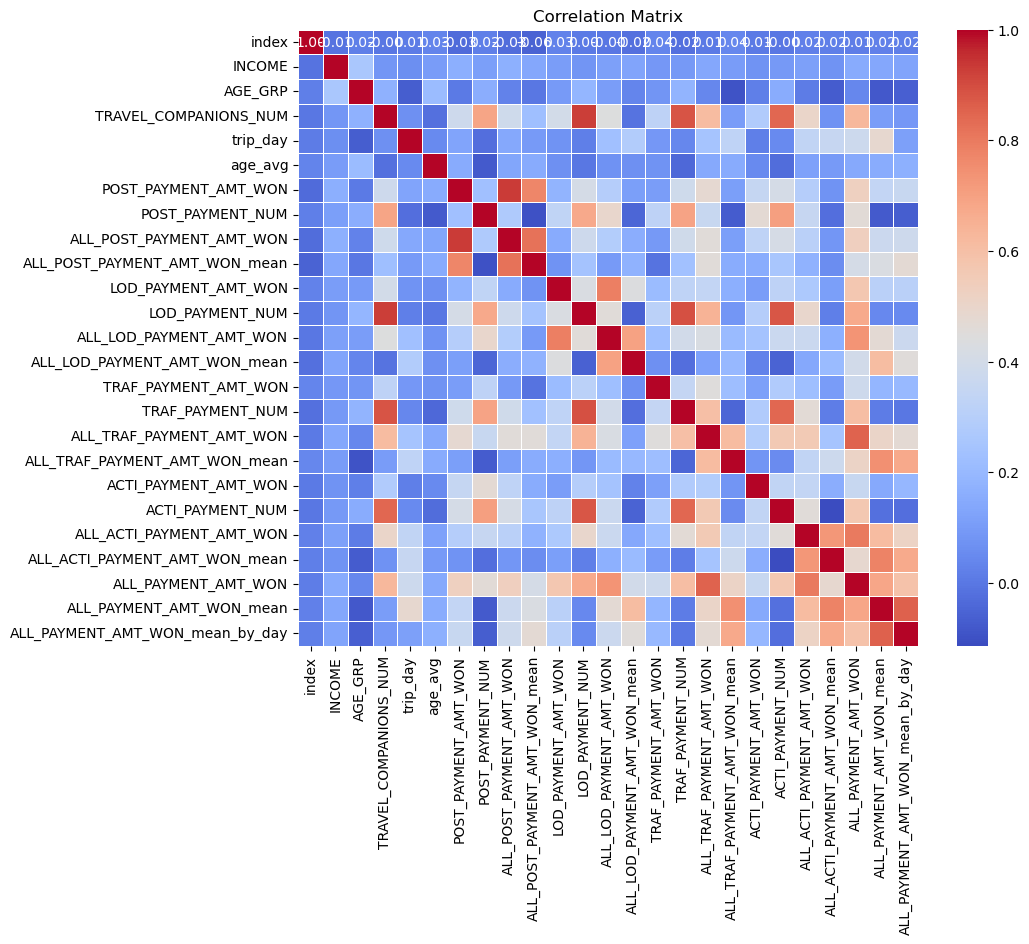

                                    index    INCOME   AGE_GRP  \
index                            1.000000 -0.012035  0.020794   
INCOME                          -0.012035  1.000000  0.256184   
AGE_GRP                          0.020794  0.256184  1.000000   
TRAVEL_COMPANIONS_NUM           -0.002960  0.083940  0.170338   
trip_day                         0.011756  0.060668 -0.069945   
age_avg                          0.031311  0.100803  0.209452   
POST_PAYMENT_AMT_WON            -0.032784  0.164022  0.006050   
POST_PAYMENT_NUM                 0.018181  0.109262  0.158115   
ALL_POST_PAYMENT_AMT_WON        -0.027011  0.164941  0.026427   
ALL_POST_PAYMENT_AMT_WON_mean   -0.056088  0.138300 -0.004186   
LOD_PAYMENT_AMT_WON              0.028153  0.107215  0.099140   
LOD_PAYMENT_NUM                  0.004327  0.080644  0.190265   
ALL_LOD_PAYMENT_AMT_WON         -0.000960  0.116442  0.103896   
ALL_LOD_PAYMENT_AMT_WON_mean    -0.019444  0.127814  0.035078   
TRAF_PAYMENT_AMT_WON     

In [238]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관 행렬 생성
correlation_matrix = combined_data.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

print(correlation_matrix)

In [214]:
########################## 1

In [219]:
combined_data['ALL_PAYMENT_AMT_WON'].describe()

count    2.803000e+03
mean     9.625916e+05
std      9.953060e+05
min      0.000000e+00
25%      2.817750e+05
50%      7.150380e+05
75%      1.317384e+06
max      1.494223e+07
Name: ALL_PAYMENT_AMT_WON, dtype: float64

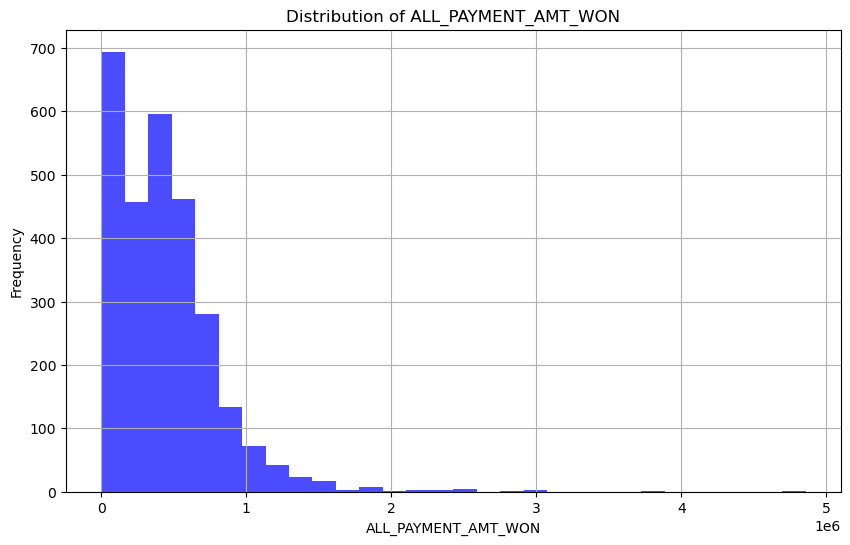

In [244]:
import matplotlib.pyplot as plt

# 'ALL_PAYMENT_AMT_WON'의 분포를 히스토그램으로 시각화
plt.figure(figsize=(10, 6))
plt.hist(combined_data['ALL_PAYMENT_AMT_WON_mean'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of ALL_PAYMENT_AMT_WON')
plt.xlabel('ALL_PAYMENT_AMT_WON')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [251]:
tmplst = combined_data[combined_data['ALL_PAYMENT_AMT_WON_mean']<600000]
print(len(tmplst)/len(combined_data['ALL_PAYMENT_AMT_WON_mean']))

0.7502675704602212


In [252]:
# 'ALL_PAYMENT_AMT_WON_mean' 값에 따라 'ALL_PAYMENT_AMT_WON_mean_sep' 생성
combined_data['ALL_PAYMENT_AMT_WON_mean_sep'] = np.where(combined_data['ALL_PAYMENT_AMT_WON_mean'] < 600000, 0, 1)


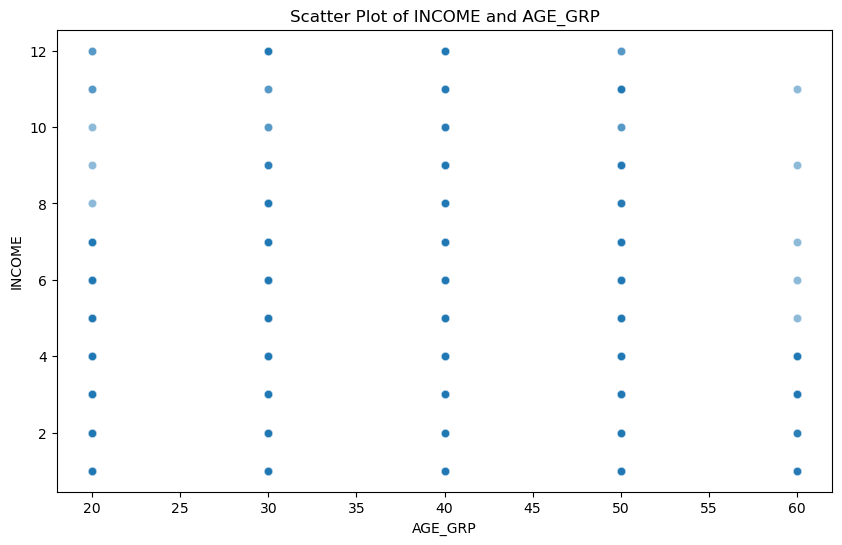

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AGE_GRP', y='INCOME', data=combined_data, alpha=0.5)
plt.title('Scatter Plot of INCOME and AGE_GRP')
plt.xlabel('AGE_GRP')
plt.ylabel('INCOME')
plt.show()


In [256]:
X = combined_data[['AGE_GRP','ALL_PAYMENT_AMT_WON_mean_sep']]
y = combined_data['INCOME']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = np.where(y_train >= 5, 5, y_train)
y_train = np.where(y_train <= 3, 3, y_train)
y_train = np.where((y_train == 4), 4, y_train)
y_test = np.where(y_test >= 5, 5, y_test)
y_test = np.where(y_test <= 3, 3, y_test)
y_test = np.where((y_test == 4), 4, y_test)

y_train = np.where(y_train == 3, 0, y_train)
y_train = np.where(y_train == 4, 1, y_train)
y_train = np.where(y_train == 5, 1, y_train)
y_test = np.where(y_test == 3, 0, y_test)
y_test = np.where(y_test == 4, 1, y_test)
y_test = np.where(y_test == 5, 1, y_test)

# Convert NumPy array to Pandas Series
y_test_series = pd.Series(y_test)

# Now you can use value_counts()
value_counts = y_test_series.value_counts()
print(value_counts)

y_train_series = pd.Series(y_train)

# Now you can use value_counts()
value_counts = y_train_series.value_counts()
print(value_counts)

1    373
0    188
dtype: int64
1    1442
0     800
dtype: int64


In [257]:
from sklearn.model_selection import GridSearchCV

# RandomForest 모델 초기화
rf_model = RandomForestClassifier(random_state=42)

# 탐색할 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Grid Search 실행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Parameters: ", grid_search.best_params_)

# 최적의 모델 사용
best_rf_model = grid_search.best_estimator_

# 테스트 데이터에 대한 예측
predictions = best_rf_model.predict(X_test)

# 정확도 및 기타 평가 지표 출력
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# 분류 보고서 출력
print('\nClassification Report:')
print(classification_report(y_test, predictions))

# 혼동 행렬 출력
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predictions))



Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.68

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.45      0.48       188
           1       0.74      0.80      0.77       373

    accuracy                           0.68       561
   macro avg       0.63      0.62      0.63       561
weighted avg       0.67      0.68      0.67       561


Confusion Matrix:
[[ 84 104]
 [ 75 298]]


In [258]:
from xgboost import XGBClassifier

# XGBoost 모델 초기화
xgb_model = XGBClassifier()

# 탐색할 하이퍼파라미터 그리드 설정
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

# GridSearchCV 객체 생성
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)

# Grid Search 실행
grid_search_xgb.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Parameters (XGBoost): ", grid_search_xgb.best_params_)

# 최적의 모델 사용
best_xgb_model = grid_search_xgb.best_estimator_

# 테스트 데이터에 대한 예측
predictions_xgb = best_xgb_model.predict(X_test)

# 정확도 및 기타 평가 지표 출력
accuracy_xgb = accuracy_score(y_test, predictions_xgb)
print(f'Accuracy (XGBoost): {accuracy_xgb:.2f}')

# 분류 보고서 출력
print('\nClassification Report (XGBoost):')
print(classification_report(y_test, predictions_xgb))

# 혼동 행렬 출력
print('\nConfusion Matrix (XGBoost):')
print(confusion_matrix(y_test, predictions_xgb))


Best Parameters (XGBoost):  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Accuracy (XGBoost): 0.66

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.50      0.02      0.03       188
           1       0.67      0.99      0.80       373

    accuracy                           0.66       561
   macro avg       0.58      0.50      0.41       561
weighted avg       0.61      0.66      0.54       561


Confusion Matrix (XGBoost):
[[  3 185]
 [  3 370]]


In [259]:
import joblib
joblib.dump(best_rf_model,'rf_model_for_income.pkl')

['rf_model_for_income.pkl']

In [ ]:
################################# 2

In [121]:
final_data=combined_data.drop(['TRAVEL_STATUS_DESTINATION', 'POST_PAYMENT_AMT_WON', 'POST_PAYMENT_NUM', 'LOD_PAYMENT_AMT_WON', 'LOD_PAYMENT_NUM',
                              'TRAF_PAYMENT_AMT_WON', 'TRAF_PAYMENT_NUM', 'ACTI_PAYMENT_AMT_WON', 'ACTI_PAYMENT_NUM',],axis=1)

In [122]:
final_data.to_csv('for_income_final_data.csv', index = False)

In [123]:
final_data.columns

Index(['TRAVEL_ID', 'INCOME', 'AGE_GRP', 'TRAVEL_COMPANIONS_NUM', 'trip_day',
       'age_avg', 'ALL_POST_PAYMENT_AMT_WON', 'ALL_POST_PAYMENT_AMT_WON_mean',
       'ALL_LOD_PAYMENT_AMT_WON', 'ALL_LOD_PAYMENT_AMT_WON_mean',
       'ALL_TRAF_PAYMENT_AMT_WON', 'ALL_TRAF_PAYMENT_AMT_WON_mean',
       'ALL_ACTI_PAYMENT_AMT_WON', 'ALL_ACTI_PAYMENT_AMT_WON_mean',
       'ALL_PAYMENT_AMT_WON', 'ALL_PAYMENT_AMT_WON_mean',
       'ALL_PAYMENT_AMT_WON_mean_by_day'],
      dtype='object')

In [124]:
# 누락된 값 확인
final_data_1 = final_data
missing_values = final_data.isnull().sum()

# 누락된 값이 있는 열 확인
columns_with_missing_values = missing_values[missing_values > 0].index

# 각 열의 누락된 값 개수 출력
print("Missing values by column:")
print(missing_values[columns_with_missing_values])

# 누락된 값을 0으로 대체
final_data = final_data.fillna(0)


Missing values by column:
age_avg                           919
ALL_POST_PAYMENT_AMT_WON         2306
ALL_POST_PAYMENT_AMT_WON_mean    2306
ALL_LOD_PAYMENT_AMT_WON           583
ALL_LOD_PAYMENT_AMT_WON_mean      583
ALL_TRAF_PAYMENT_AMT_WON          184
ALL_TRAF_PAYMENT_AMT_WON_mean     184
ALL_ACTI_PAYMENT_AMT_WON           25
ALL_ACTI_PAYMENT_AMT_WON_mean      25
dtype: int64


In [125]:
from sklearn.model_selection import train_test_split
x = final_data.drop(['TRAVEL_ID','ALL_POST_PAYMENT_AMT_WON', 'ALL_POST_PAYMENT_AMT_WON_mean',
       'ALL_LOD_PAYMENT_AMT_WON', 'ALL_LOD_PAYMENT_AMT_WON_mean',
       'ALL_TRAF_PAYMENT_AMT_WON', 'ALL_TRAF_PAYMENT_AMT_WON_mean',
       'ALL_ACTI_PAYMENT_AMT_WON', 'ALL_ACTI_PAYMENT_AMT_WON_mean',
       'ALL_PAYMENT_AMT_WON', 'ALL_PAYMENT_AMT_WON_mean','INCOME','trip_day'],axis=1)
y = final_data['INCOME']
X_train,X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, shuffle=True, random_state=42)

In [126]:
print(x.info())
print(y)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2803 entries, 1483 to 471123
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   AGE_GRP                          2803 non-null   int64  
 1   TRAVEL_COMPANIONS_NUM            2803 non-null   int64  
 2   age_avg                          2803 non-null   float64
 3   ALL_PAYMENT_AMT_WON_mean_by_day  2803 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 109.5 KB
None
1483      3
3451      1
9829      4
15363     4
16019     5
         ..
470856    4
470857    5
470865    2
470955    3
471123    3
Name: INCOME, Length: 2803, dtype: int64


In [127]:
X_train.to_csv("for_income_total_X_train_new.csv", index=False)
y_train.to_csv("for_income_total_y_train_new.csv", index=False)

In [135]:
X_train= pd.read_csv('for_income_total_X_train_new.csv')
y_train= pd.read_csv('for_income_total_y_train_new.csv')

In [136]:
#unique_counts = X_train['INCOME'].value_counts()
#print(unique_counts)
#unique_counts = X_test['INCOME'].value_counts()
#print(unique_counts)
print(y_train.info())
print(y_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242 entries, 0 to 2241
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   INCOME  2242 non-null   int64
dtypes: int64(1)
memory usage: 17.6 KB
None
[6 6 6 6 4 2 5 4 3 5 4 3 2 5 2 4 6 6 4 4 4 1 4 5 3 3 6 5 4 4 5 2 4 3 2 3 6
 1 5 1 5 3 4 4 4 5 5 4 4 4 4 5 4 2 2 5 6 4 1 4 5 4 4 4 2 4 4 5 5 1 3 4 3 4
 4 4 3 5 4 2 4 4 4 1 5 3 6 3 5 5 4 4 3 1 6 5 1 4 4 4 4 5 4 4 6 4 4 3 5 4 2
 4 4 4 2 6 4 3 4 3 4 6 5 6 4 4 4 3 3 4 2 5 4 5 4 4 4 3 4 3 3 2 4 6 4 6 6 6
 4 5 5 6 4 4 6 4 4 5 5 3 2 1 3 4 6 3 4 3 6 4 4 4 5 4 4 4 4 4 6 4 3 5 4 3 6
 4 3 1 4 5 4 4 3 6 6 4 3 6 5 4 5 4 4 6 3 4 4 4 4 6 5 5 4 5 4 6 5 1 1 3 6 5
 5 5 3 3 6 3 6 3 6 3 4 3 4 5 6 6 4 2 6 5 4 3 5 3 4 4 5 2 6 5 4 3 6 6 2 4 5
 3 5 4 4 4 5 4 3 1 4 4 4 2 2 6 1 4 1 1 4 6 5 2 2 6 5 3 4 4 2 4 2 6 6 4 6 2
 4 4 2 4 2 2 5 4 4 6 4 4 3 5 6 5 2 5 6 1 3 3 5 5 1 5 1 4 4 2 4 2 3 2 4 4 6
 4 4 2 4 4 6 2 3 1 4 5 6 3 2 6 4 2 1 4 3 5 5 4 5 2 4 1 2 3 6 4 1 6 3 6

In [137]:
unique_counts = y_train.value_counts()
print(unique_counts)

INCOME
4         792
5         364
3         326
2         245
1         229
6         131
7          68
8          35
12         18
9          15
11         13
10          6
dtype: int64


In [139]:
import numpy as np

y_train = np.where(y_train > 6, 6, y_train)
y_train = np.where(y_train < 3 ,3, y_train)
y_train = np.where((y_train == 4) | (y_train == 5), 4, y_train)
y_test = np.where(y_test > 6, 6, y_test)
y_test = np.where(y_test < 3 ,3, y_test)
y_test = np.where((y_test == 4) | (y_test == 5), 4, y_test)

In [141]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# CatBoost 모델 초기화
catboost_model = CatBoostClassifier()

# 탐색할 하이퍼파라미터 그리드 설정
param_grid = {
    'iterations': [50,70,80,100, 200, 300],
    'depth': [2,3,4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1,0.15,0.2],
    'cat_features': [['AGE_GRP']],  # 'AGE_GRP'는 카테고리형 변수이므로 리스트로 변환하여 지정
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# 그리드 서치 실행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Parameters: ", grid_search.best_params_)

# 최적의 모델 사용
best_model = grid_search.best_estimator_

# 테스트 데이터에 대한 예측
predictions = best_model.predict(X_test)

# 모델 평가
accuracy = (predictions == y_test).mean()
print("Accuracy: {:.2f}%".format(accuracy * 100))


0:	learn: 1.0751678	total: 6.37ms	remaining: 630ms
1:	learn: 1.0566740	total: 12.1ms	remaining: 592ms
2:	learn: 1.0400188	total: 18.5ms	remaining: 597ms
3:	learn: 1.0273372	total: 22.8ms	remaining: 548ms
4:	learn: 1.0162777	total: 29ms	remaining: 551ms
5:	learn: 1.0069886	total: 35.2ms	remaining: 551ms
6:	learn: 0.9933788	total: 40.5ms	remaining: 538ms
7:	learn: 0.9799170	total: 46.6ms	remaining: 536ms
8:	learn: 0.9692172	total: 52.9ms	remaining: 535ms
9:	learn: 0.9602531	total: 58.8ms	remaining: 529ms
10:	learn: 0.9529253	total: 65ms	remaining: 526ms
11:	learn: 0.9460077	total: 70.9ms	remaining: 520ms
12:	learn: 0.9407845	total: 77.9ms	remaining: 521ms
13:	learn: 0.9346738	total: 85ms	remaining: 522ms
14:	learn: 0.9295816	total: 91.3ms	remaining: 517ms
15:	learn: 0.9248733	total: 98ms	remaining: 514ms
16:	learn: 0.9217291	total: 104ms	remaining: 508ms
17:	learn: 0.9188473	total: 110ms	remaining: 502ms
18:	learn: 0.9170339	total: 116ms	remaining: 496ms
19:	learn: 0.9143899	total: 122ms

In [131]:
# Concatenate x and y along columns
combined_data = pd.concat([x, y], axis=1)

# Calculate the correlation matrix
correlation_matrix = combined_data.corr()

# Display the correlation matrix
print(correlation_matrix)

# If you are interested in the correlation of 'INCOME' with other features only:
income_correlation = combined_data.corr()['INCOME']
print(income_correlation)



                                  AGE_GRP  TRAVEL_COMPANIONS_NUM   age_avg  \
AGE_GRP                          1.000000               0.170338  0.138341   
TRAVEL_COMPANIONS_NUM            0.170338               1.000000  0.478634   
age_avg                          0.138341               0.478634  1.000000   
ALL_PAYMENT_AMT_WON_mean_by_day -0.065766               0.090549  0.123235   
INCOME                           0.256184               0.083940  0.075277   

                                 ALL_PAYMENT_AMT_WON_mean_by_day    INCOME  
AGE_GRP                                                -0.065766  0.256184  
TRAVEL_COMPANIONS_NUM                                   0.090549  0.083940  
age_avg                                                 0.123235  0.075277  
ALL_PAYMENT_AMT_WON_mean_by_day                         1.000000  0.125803  
INCOME                                                  0.125803  1.000000  
AGE_GRP                            0.256184
TRAVEL_COMPANIONS_NUM    

In [132]:
correlation_matrix = x.corr()
print(correlation_matrix)


                                  AGE_GRP  TRAVEL_COMPANIONS_NUM   age_avg  \
AGE_GRP                          1.000000               0.170338  0.138341   
TRAVEL_COMPANIONS_NUM            0.170338               1.000000  0.478634   
age_avg                          0.138341               0.478634  1.000000   
ALL_PAYMENT_AMT_WON_mean_by_day -0.065766               0.090549  0.123235   

                                 ALL_PAYMENT_AMT_WON_mean_by_day  
AGE_GRP                                                -0.065766  
TRAVEL_COMPANIONS_NUM                                   0.090549  
age_avg                                                 0.123235  
ALL_PAYMENT_AMT_WON_mean_by_day                         1.000000  
